<H1>Project2:Football_Data_Analysis</H1>

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>
<a id='intro'></a>
## Introduction
Analysing the 11 european countries with their lead championship on the basis of list of attributes.This shows the relation between the variables,players performance rate and summery of matches

Problems for Analysing
<li>which team has the highest goal</a></li>
<li></a></li>





In [ ]:
#import libraries
import sqlite3
import pandas as pd
import numpy as np
% matplotlib  inline
import matplotlib.pyplot as plt
import seaborn as sns
cnx = sqlite3.connect(r'C:\Users\anast\Downloads\database.sqlite')
cur = cnx.cursor()
results = cur.fetchall()

print(results)



<a id='wrangling'></a>
## Data Wrangling
collecting data using sql query

In [2]:

df1 = pd.read_sql_query("select * from Country;", cnx)
df2 = pd.read_sql_query("select * from League ;", cnx)
df3 = pd.read_sql_query("select * from Match ;", cnx)
df4= pd.read_sql_query("select * from Player ;", cnx)
df5 = pd.read_sql_query("select * from Player_Attributes ;", cnx)
df6 = pd.read_sql_query("select * from Team ;", cnx)
df7= pd.read_sql_query("select * from Team_Attributes ;", cnx)
df8= pd.read_sql_query("select * from sqlite_sequence ;", cnx)






### Data Cleaning

In [3]:
#df1
df1.head(2)

,id,name
0,1,Belgium
1,1729,England


In [4]:
sum(df1.duplicated())

0

In [5]:
df2.head(2)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [6]:
df2.isnull().sum()

id            0
country_id    0
name          0
dtype: int64

In [7]:
#merging two tables(df1&df2)
country_league=df1.merge(df2,left_on="id",right_on="id",how='inner')

In [8]:
country_league.head(3)

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1


In [9]:
#Renaming the column 
country_league.rename(columns={'name_x':'country','name_y':'country_league'},inplace=True)

In [10]:
#remove the "id" column
country_league.drop(["id"],axis=1,inplace=True)

In [11]:
country_league.isnull().sum()

country           0
country_id        0
country_league    0
dtype: int64

In [12]:
df3.nunique()

id                  25979
country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
home_player_X1          3
home_player_X2          9
home_player_X3          8
home_player_X4          7
home_player_X5          9
home_player_X6          9
home_player_X7          9
home_player_X8          9
home_player_X9          9
home_player_X10         9
home_player_X11         6
away_player_X1          3
away_player_X2          8
away_player_X3          8
away_player_X4          8
away_player_X5          9
away_player_X6          9
away_player_X7          9
away_player_X8          9
                    ...  
B365H                 121
B365D                  72
B365A                 115
BWH                   237
BWD                   133
BWA                   261
IWH                   147
IWD         

In [13]:
#create necessary columns
df_3=df3[['id','country_id','league_id','season','stage','date','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']]

In [22]:
df_3.nunique()

id                  25979
country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
dtype: int64

In [14]:
df_3.isnull().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

In [24]:
country_league.head(2)

,country,country_id,country_league
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League


In [15]:
df_3.drop(["id"],axis=1,inplace=True)

C:\Users\anast\Anaconda_3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [141]:
df8.head(2)

,name,seq
0,Team,103916
1,Country,51958


In [137]:
country_league_match.head(2)

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,country_league,total_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,2
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,0


In [64]:
country_league_match.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,country_league
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League


In [16]:
country_league_match.nunique()

id                  25979
country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
country_league         11
dtype: int64

In [67]:
country_league_match.isnull().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country             0
country_league      0
dtype: int64

In [68]:
country_league_match.dropna(inplace=True)

In [69]:
sum(country_league_match.duplicated())

0

In [70]:
df4.drop(["id"],axis=1,inplace=True)

KeyError: "labels ['id'] not contained in axis"

In [22]:
df5.head(3)
df5.drop(["id"],axis=1,inplace=True)

In [23]:
df5.isnull().sum()

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

In [71]:
df5.dropna(inplace=True)

In [72]:
df5.isnull().sum()

player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0


In [73]:
df6.isnull().sum()
sum(df6.duplicated())

0

In [27]:
sum(df7.duplicated())

0

In [76]:
sum(df8.duplicated())

0

In [30]:
df8.isnull().sum()

name    0
seq     0
dtype: int64

In [77]:
df8.isnull().sum().any()

False

In [41]:
df8.head(5)

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075


<a id='eda'></a>
## Exploratory Data Analysis


Text(0.5,1,'number of matches and league')

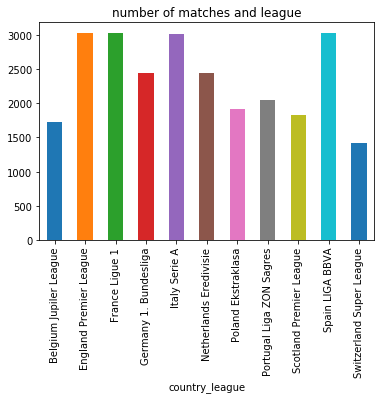

In [71]:

country_league_match.groupby(['country_league']).count()['season'].plot(kind='bar')
plt.title("number of matches and league")

In [78]:
#merging the data
df4_df5=df5.merge(df4,left_on="player_api_id",right_on="player_api_id",how="inner")

In [32]:
df4_df5.tail(10)

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
183968,183969,102359,39902,2012-08-31 00:00:00,78.0,78.0,right,medium,low,77.0,...,13.0,8.0,15.0,5.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183969,183970,102359,39902,2012-02-22 00:00:00,81.0,81.0,right,medium,low,80.0,...,13.0,8.0,15.0,5.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183970,183971,102359,39902,2011-08-30 00:00:00,81.0,81.0,right,medium,low,80.0,...,13.0,8.0,15.0,5.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183971,183972,102359,39902,2011-02-22 00:00:00,81.0,85.0,right,medium,low,81.0,...,13.0,8.0,15.0,5.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183972,183973,102359,39902,2010-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,13.0,8.0,15.0,5.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,20.0,84.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183977,183978,102359,39902,2007-02-22 00:00:00,80.0,81.0,right,medium,low,74.0,...,9.0,78.0,7.0,15.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176


In [79]:
#drop colums
df4_df5.drop(["player_fifa_api_id_x"],axis=1,inplace=True)

In [80]:
#drop colums
df4_df5.drop(["player_fifa_api_id_y"],axis=1,inplace=True)

In [ ]:
df4_df5.drop(["id_y"],axis=1,inplace=True)

In [ ]:
  df4_df5['gk_performance'] = df4_df5['gk_diving']+df4_df5['gk_handling']+df4_df5['gk_kicking']+df4_df5 ['gk_positioning']+df4_df5['gk_reflexes']

Goal keeper performnace over the date

In [83]:
df5.isnull().sum()

player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0


In [84]:
df6.dropna(inplace=True)

In [85]:
df6.isnull().sum()

team_api_id         0
team_fifa_api_id    0
team_long_name      0
team_short_name     0
total_goal          0
dtype: int64

In [86]:
df7.dropna(inplace=True)

In [87]:
df7.head(5)

,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
7,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,Organised,...,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,Organised,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
13,614,8576,2014-09-19 00:00:00,59,Balanced,57.0,Normal,52,Mixed,Organised,...,52,Normal,Organised,38,Medium,47,Press,53,Normal,Cover


In [89]:
df7.drop_duplicates(inplace=True)

In [90]:
df7.drop_duplicates(inplace=True)

In [37]:
df6['total_goal']=country_league_match['home_team_goal']+country_league_match['away_team_goal']

In [38]:
country_league_match['total_goal']=country_league_match['home_team_goal']+country_league_match['away_team_goal']

In [43]:
df6.groupby("team_long_name")["total_goal"].sum().reset_index()

,team_long_name,total_goal
0,1. FC Kaiserslautern,4
1,1. FC Köln,3
2,1. FC Nürnberg,2
3,1. FSV Mainz 05,3
4,AC Ajaccio,3
5,AC Arles-Avignon,3
6,AC Bellinzona,0
7,ADO Den Haag,1
8,AJ Auxerre,2
9,AS Monaco,3


<a id='intro'></a>
## Total goals by country

Text(0.5,1,'total GOALS BY country')

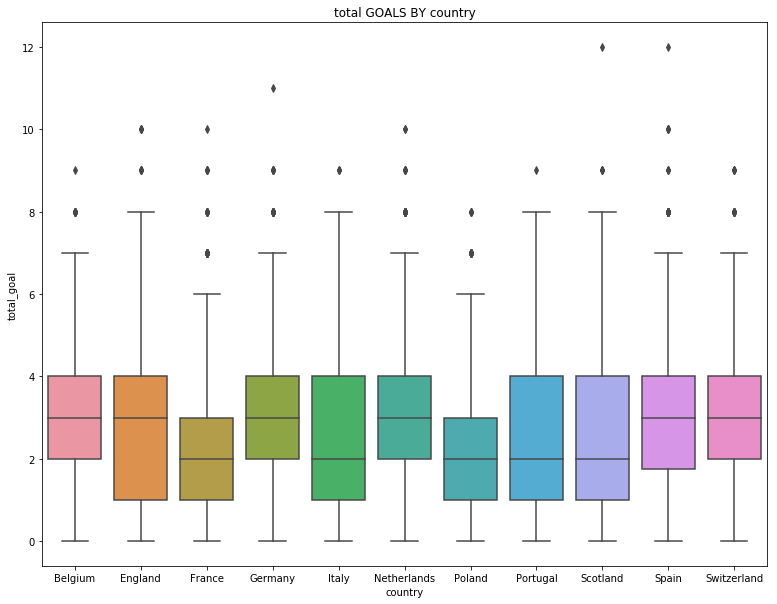

In [48]:
plt.figure(figsize=(13,10))
sns.boxplot(x = country_league_match["country"],y =country_league_match["total_goal"])
plt.title("total GOALS BY country")


<a id='intro'></a>
## Top player according to the over all rating

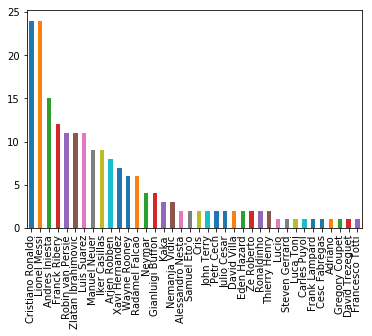

In [61]:
player1 = df4_df5[df4_df5["overall_rating"]  > 88 ]["player_name"].value_counts().plot(kind='bar')